
# IMPORT DATA


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


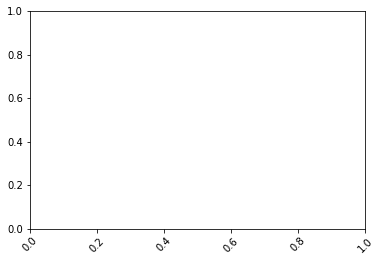

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt   

import seaborn as sns 
import missingno as msno
%matplotlib inline 
import warnings
warnings. filterwarnings('ignore')
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic') 
plt.xticks(rotation=45) # xticks 각도
palette1= sns.color_palette('colorblind',29)
sns.set(rc={'figure.figsize':(30,8)}) # seaborn figure 사이즈

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import backend as K
import tensorflow as tf

In [ ]:
from google.colab import files
myfile = files.upload()

Saving 동원산업통합_분류_1_RE.csv to 동원산업통합_분류_1_RE (2).csv


In [ ]:
import io
import pandas as pd

In [ ]:
import matplotlib.font_manager as fm

font_list= [font.name for font in fm.fontManager.ttflist]
plt.rcParams['font.family'] = 'NanumGothic'
train= pd.read_csv(io.BytesIO(myfile['동원산업통합_분류_1_RE.csv']),encoding='cp949')
train.head()

,청구서번호,No.,Subject,Machinery,Assembly,청구품목,Part No.1,Part No.2,key1,key2,...,창고입고수량,Control No.,입고창고,창고출고,창고출고수량,출고선박,출고운반선,선박입고,선박입고수량,완료 여부
0,ELS-BS-ESP-2004002,12,NO.1 A/E C18 MAJOR O/H PARTS,NO.1 GENERATOR ENGINE,323-6480 LINES GP-FUEL,SEAL-O-RING-STOR,7.00E-275,NaN,7.00E-275,COOLER,...,1,혜인 발주,BS,2020-09-19,1,BLO,본선 선적,NaN,0,NaN
1,OCA-BS-ESP-2010004,5,운전시간 대비 #2 AUX ENG TOP END O/H PARTS,NO.2 GENERATOR ENGINE,GASKET KIT,OIL COOLER & LINES,7.00E-275,NaN,7.00E-275,COOLER,...,1,혜인 발주,BS,2020-09-18,1,JBG,본선 선적,NaN,0,NaN
2,MIR-BS-ESP-2011002,119,운전시간 대비 #2 AUX ENG(CAT 3512C) MAJOR O/H PARTS,NO.2 GENERATOR ENGINE,285-8374 MANIFOLD GP-EXH,WASHER,7.00E-275,NaN,7.00E-275,COOLER,...,1,NaN,BS,2020-12-12,1,BON,SANWA FONTAINE,NaN,0,NaN
3,BLO-BS-ESP-2003002,16,#1 AUX ENG TOP END O/H PARTS,NO.1 GENERATOR ENGINE,159-8828 TURBO GP,BOLT-HIGH TEMP,7.00E-275,NaN,7.00E-275,COOLER,...,1,혜인 발주,BS,2021-06-16,1,MIR,체항수리 시 사용,NaN,0,NaN
4,DEO-BS-ESP-2105008,97,DEO-E-210512-01,NO.1 GENERATOR ENGINE,2N4727 INSTRUMNT PANEL GP,SEAL,7.00E-275,NaN,7.00E-275,COOLER,...,1,NaN,BS,NaN,0,NaN,NaN,NaN,0,NaN


# GOAL

데이터를 통해 인사이트 도출 및 모델 생성

# About Data

**동원산업** 
<br>2018-09-27~ 2021-09-30 까지의 구매 보급 데이터

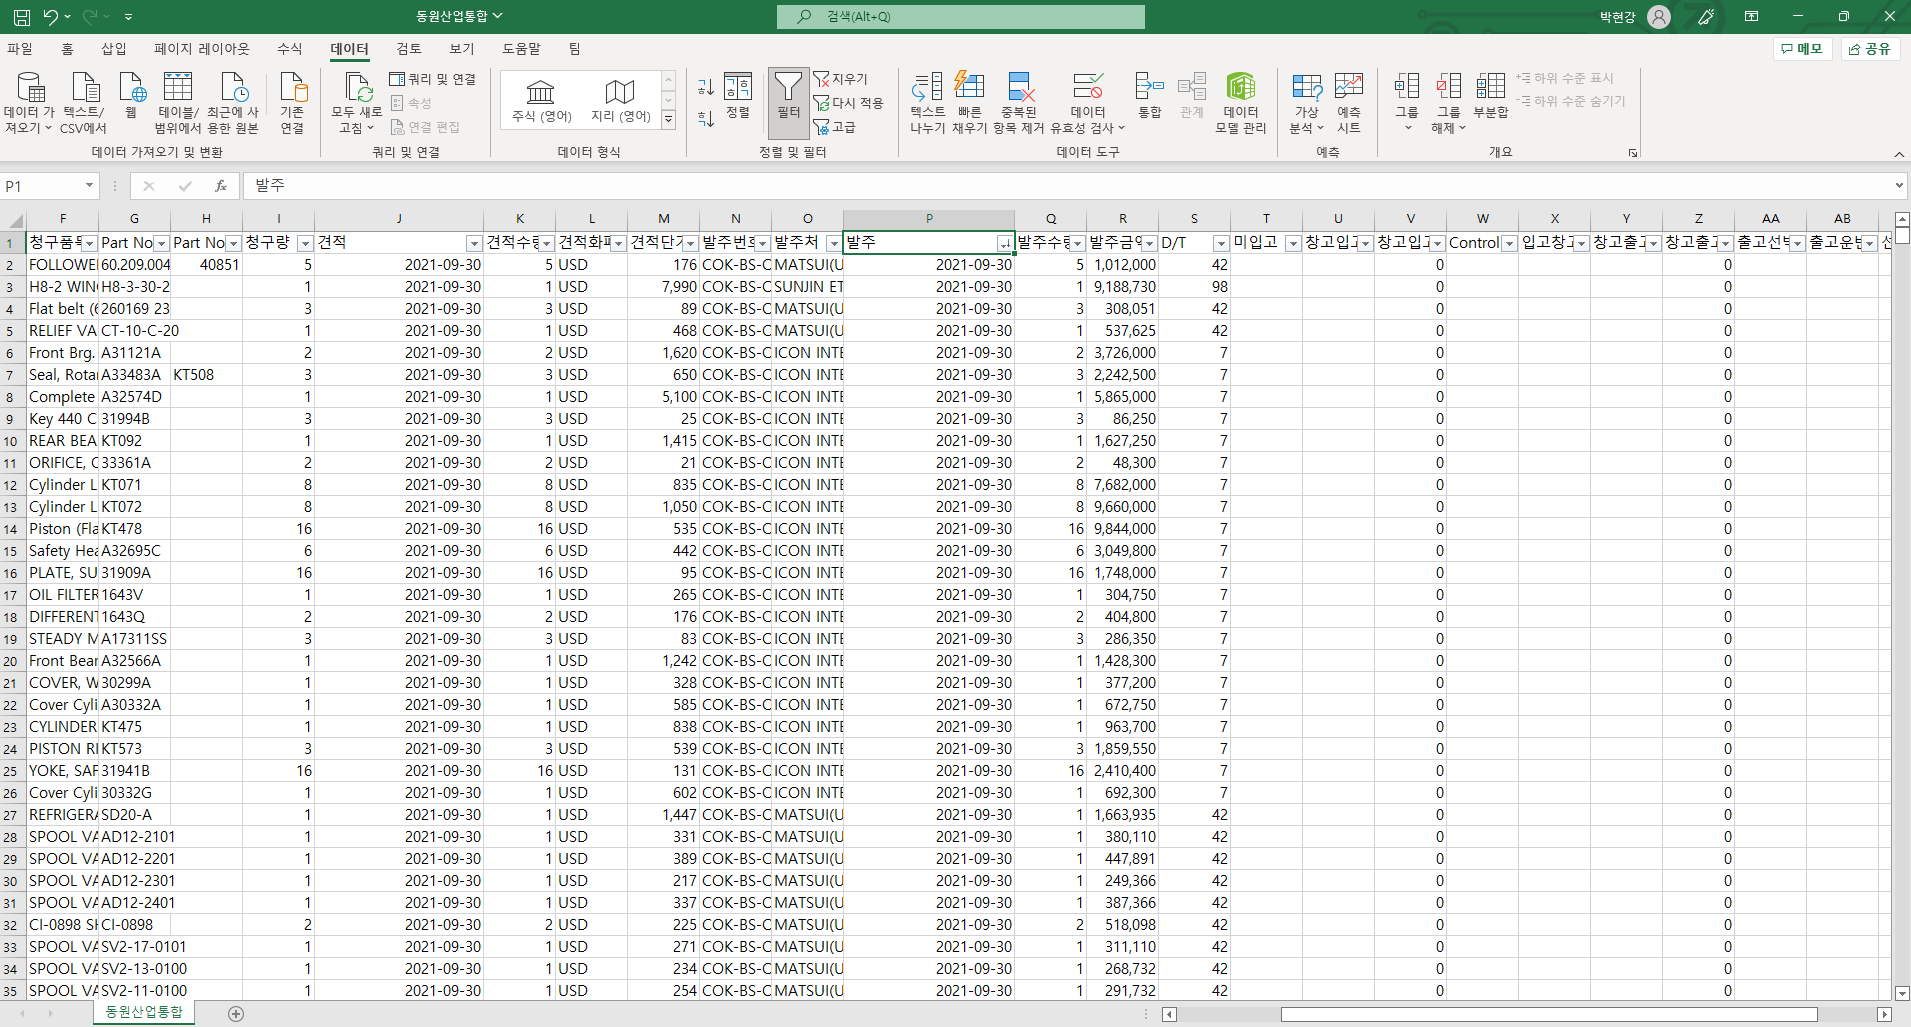

### 리드타임 = 창고입고(일) - 발주(일)

리드타임 음수값인 CASE 제거 후 

21084 개의 행과 30개의 열로 구성

# REMARK

## DATA LABELING

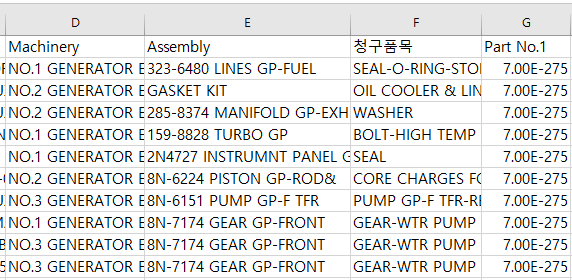

Machinery , Assembly, 청구품목, Part No .1 의 정보를 이용하여 DATA LABELING 작업을 진행한다.

#### 개별 고유값
Machinery : 173
<br>
Assembly : 1704
<br>
청구품목 : 6144
<br>
Part No.1 : 8275

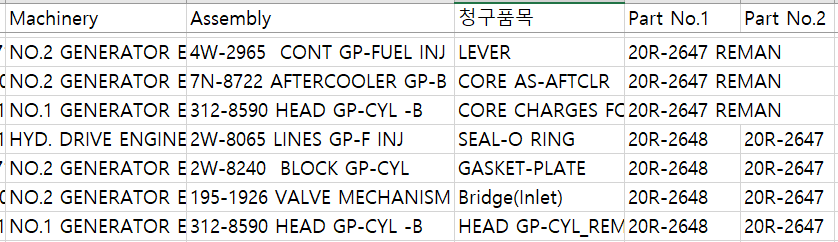

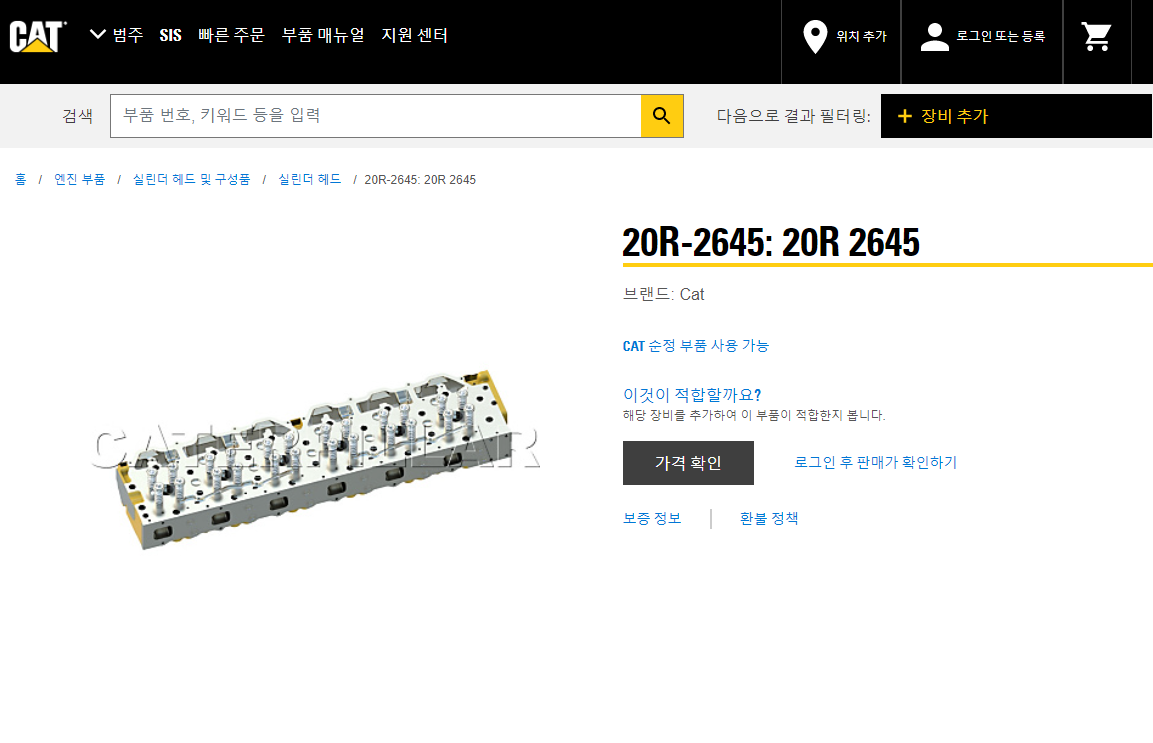

20R-2645 는 실린더 헤드 -> CYLINDER로 LABELING 하였다.

61개의 값으로 레이블링하였다

In [ ]:
train['key2'].value_counts()

GASKET     4088
O-RING     2188
BEARING    1238
VALVE      1023
PUMP        972
           ... 
TURBINE      31
LINE         27
DAMPER       22
BRAKE        18
CARD         12
Name: key2, Length: 61, dtype: int64

**라벨링 과정은 6시간씩 1주일이 걸렸다.**

Machinery , Assembly, 청구품목, Part No .1 의 정보를 이용하여 LABEL한 컬럼 KEY2를 맞추는 것이 목표다.

# PREPROCESSING

모델링을 돌리기 위해 LABEL ENCODER를 사용한다.

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [ ]:
train['Machinery_Encode']= label_encoder.fit_transform(train['Machinery'])
train['Assembly_Encode']= label_encoder.fit_transform(train['Assembly'])
train['청구품목_Encode']= label_encoder.fit_transform(train['청구품목'])
train['part1_Encode']= label_encoder.fit_transform(train['Part No.1'])
train['key2_Encode']=label_encoder.fit_transform(train['key2'])

In [ ]:
columns= ['Machinery_Encode'  , 'Assembly_Encode' , '청구품목_Encode', 'part1_Encode','key2_Encode' ]
features= ['Machinery_Encode'  , 'Assembly_Encode' , '청구품목_Encode', 'part1_Encode' ]
target= ['key2_Encode']

data_Encode 에 해당 컬럼들을 넣는다.

In [ ]:
data_Encode= train[columns]
data_Encode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21084 entries, 0 to 21083
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Machinery_Encode  21084 non-null  int64
 1   Assembly_Encode   21084 non-null  int64
 2   청구품목_Encode       21084 non-null  int64
 3   part1_Encode      21084 non-null  int64
 4   key2_Encode       21084 non-null  int64
dtypes: int64(5)
memory usage: 823.7 KB


검증을 위해 7:3, 9:1 , 5:5  비율로 train, valid set 으로 분리한다.

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_tr, X_val, y_tr, y_val = train_test_split(data_Encode[features], data_Encode[target],
                                           stratify = data_Encode[target],
                                            test_size= 0.3,
                                            random_state =12345
                                           )
X_tr2, X_val2, y_tr2, y_val2 = train_test_split(data_Encode[features], data_Encode[target],
                                           stratify = data_Encode[target],
                                            test_size= 0.1,
                                            random_state =12345
                                           )
X_tr3, X_val3, y_tr3, y_val3 = train_test_split(data_Encode[features], data_Encode[target],
                                           stratify = data_Encode[target],
                                            test_size= 0.5,
                                            random_state =12345
                                           )

# MODEL LEARNING

## 1. RANDOM FOREST CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics


7:3

In [ ]:
model = RandomForestClassifier()
model.fit(X_tr, y_tr)
pred_val = model.predict(X_val)

In [ ]:
metrics.accuracy_score(pred_val, y_val)

0.7771103382864369

9:1

In [ ]:
model2 = RandomForestClassifier()
model2.fit(X_tr2, y_tr2)
pred_val2 = model2.predict(X_val2)

In [ ]:
metrics.accuracy_score(pred_val2, y_val2)

0.8003793266951161

5:5

In [ ]:
model3 = RandomForestClassifier()
model3.fit(X_tr3, y_tr3)
pred_val3 = model3.predict(X_val3)

In [ ]:
metrics.accuracy_score(pred_val3, y_val3)

0.7463479415670651

# PYCARET 활용

라이브러리 INSTALL

In [ ]:
!pip install pycaret[full]
!pip install markupsafe==2.0.1
import jinja2
from pycaret.classification import *

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached MarkupSafe-2.1.1-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (25 kB)
  Attempting uninstall: MarkupSafe
    Found existing installation: MarkupSafe 2.0.1
    Uninstalling MarkupSafe-2.0.1:
      Successfully uninstalled MarkupSafe-2.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached MarkupSafe-2.0.1-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (31 kB)
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Succes

점수 비교를 위해 데이터를 붙인다.

In [ ]:
TR = pd.concat([X_tr, y_tr], axis=1)
VAL = pd.concat([X_val, y_val], axis=1)

In [ ]:
TR2 = pd.concat([X_tr2, y_tr2], axis=1)
VAL2 = pd.concat([X_val2, y_val2], axis=1)

In [ ]:
TR3 = pd.concat([X_tr3, y_tr3], axis=1)
VAL3 = pd.concat([X_val3, y_val3], axis=1)

환경설정

In [ ]:
clf= setup(data=TR, target='key2_Encode')

,Description,Value
0,session_id,864
1,Target,key2_Encode
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(14758, 5)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='key2_Encode', time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

BEST 5 출력

In [ ]:
top5 = compare_models(sort='Accuracy', n_select=5)

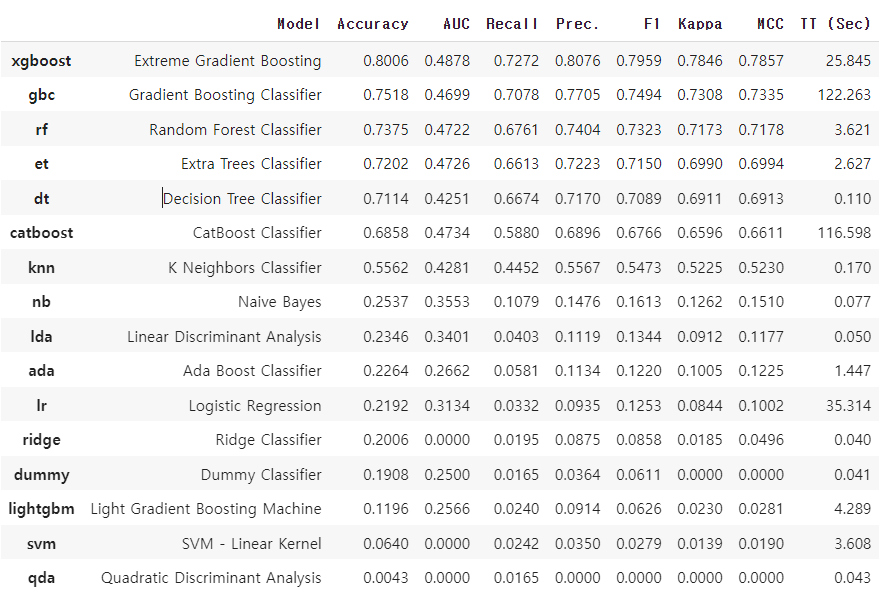

XGBOOST가 정확도가 제일 높다

fold는 교차 데이터셋 분할 수

In [ ]:
xg1 = create_model('xgboost',fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8006,0.0000,0.7335,0.8022,0.7961,0.7849,0.7857
1,0.7711,0.0000,0.6961,0.7795,0.7674,0.7526,0.7537
2,0.7909,0.9738,0.7418,0.7966,0.7883,0.7743,0.7752
3,0.7841,0.9708,0.6707,0.7891,0.7801,0.7667,0.7678
4,0.7924,0.9723,0.6973,0.7972,0.7882,0.7755,0.7768
Mean,0.7878,0.5834,0.7079,0.7929,0.7840,0.7708,0.7718
Std,0.0099,0.4763,0.0262,0.0079,0.0097,0.0108,0.0107


INFO:logs:create_model_container: 1
INFO:logs:master_model_container: 1
INFO:logs:display_container: 2
INFO:logs:XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=864, reg_alpha=0, ...)
INFO:logs:create_model() succesfully completed......................................


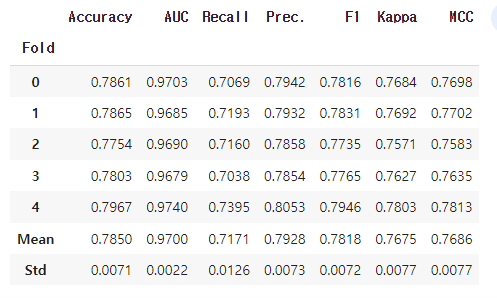

In [ ]:

prediction = predict_model(xg1, VAL)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=864, reg_alpha=0, ...), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.8117,0.9753,0.7326,0.8168,0.8097,0.7965,0.7973


In [ ]:
prediction

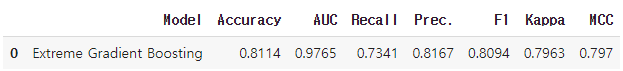

In [ ]:
xg2 = create_model('xgboost',fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7928,0.9739,0.7170,0.8018,0.7878,0.7763,0.7773
1,0.8035,0.0000,0.7522,0.8161,0.8001,0.7874,0.7888
2,0.7967,0.0000,0.7683,0.8045,0.7939,0.7806,0.7813
3,0.7948,0.0000,0.7636,0.7978,0.7892,0.7785,0.7793
4,0.7822,0.9662,0.6886,0.7848,0.7760,0.7642,0.7657
5,0.7948,0.9749,0.7098,0.7976,0.7884,0.7785,0.7792
6,0.7938,0.0000,0.6854,0.7946,0.7876,0.7775,0.7782
7,0.8035,0.0000,0.7585,0.8084,0.7991,0.7879,0.7887
8,0.8015,0.0000,0.7508,0.8141,0.8006,0.7856,0.7867


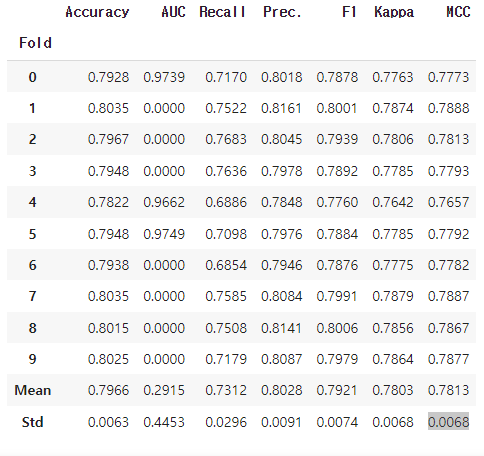

In [ ]:
prediction2 = predict_model(xg2,VAL)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=6637, reg_alpha=0, ...), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.8114,0.9765,0.7341,0.8167,0.8094,0.7963,0.797


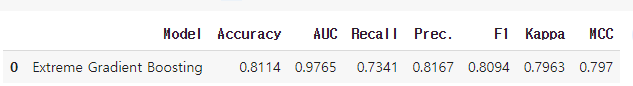

In [ ]:
xg3 = create_model('xgboost',fold=15)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8302,0.0000,0.7255,0.8346,0.8237,0.8167,0.8177
1,0.8142,0.0000,0.7839,0.8169,0.8089,0.7999,0.8006
2,0.7954,0.0000,0.7635,0.8142,0.7927,0.7778,0.7804
3,0.7997,0.0000,0.7317,0.8080,0.7931,0.7843,0.7850
4,0.7954,0.0000,0.7222,0.8052,0.7913,0.7789,0.7800
5,0.8142,0.9736,0.7788,0.8210,0.8125,0.7999,0.8005
6,0.7896,0.0000,0.6959,0.7953,0.7821,0.7720,0.7738
7,0.7779,0.0000,0.7305,0.7799,0.7716,0.7597,0.7610
8,0.8113,0.0000,0.7329,0.8137,0.8060,0.7965,0.7972


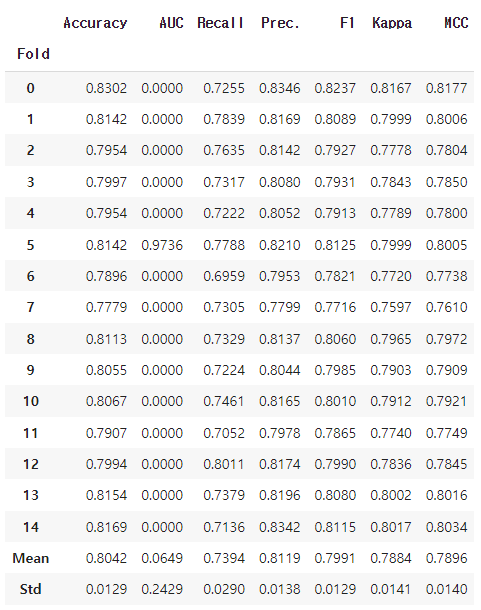

In [ ]:
prediction3 = predict_model(xg3, data= VAL)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=6637, reg_alpha=0, ...), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.909,0.9923,0.8798,0.9103,0.9085,0.902,0.9022


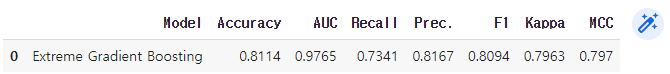

In [ ]:
xg4 = create_model('xgboost',fold=2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7297,0.955,0.6261,0.7360,0.7248,0.7069,0.7086
1,0.7338,0.957,0.6564,0.7394,0.7293,0.7118,0.7130
Mean,0.7318,0.956,0.6413,0.7377,0.7270,0.7093,0.7108
Std,0.0020,0.001,0.0152,0.0017,0.0023,0.0024,0.0022


In [ ]:
prediction4 = predict_model(xg4, data= VAL)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.8114,0.9765,0.7341,0.8167,0.8094,0.7963,0.797


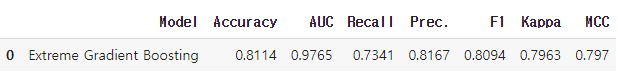

## 1:9 로 환경 설정

In [ ]:
clf2= setup(data=TR2, target='key2_Encode')

,Description,Value
0,session_id,4691
1,Target,key2_Encode
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(18975, 5)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
xg2_1 = create_model('xgboost',fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8081,0.9772,0.7490,0.8144,0.8061,0.7923,0.7936
1,0.8171,0.9779,0.7444,0.8198,0.8141,0.8026,0.8032
2,0.8117,0.9780,0.7119,0.8155,0.8077,0.7964,0.7974
3,0.8114,0.9749,0.7500,0.8186,0.8090,0.7962,0.7972
4,0.7899,0.9728,0.7163,0.7921,0.7876,0.7733,0.7739
Mean,0.8076,0.9762,0.7343,0.8121,0.8049,0.7922,0.7931
Std,0.0093,0.0020,0.0167,0.0102,0.0091,0.0100,0.0101


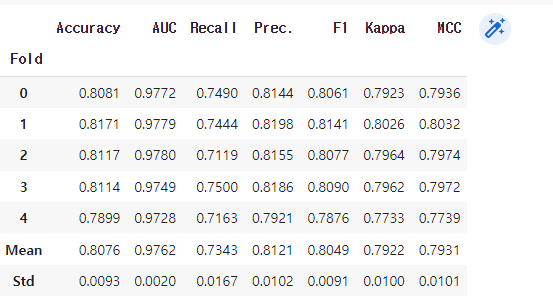![image.png](
    
)

In [ ]:
prediction2_1 = predict_model(xg2_1, data= VAL2)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=4691, reg_alpha=0, ...), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.8402,0.9817,0.7696,0.8471,0.8384,0.8273,0.8284


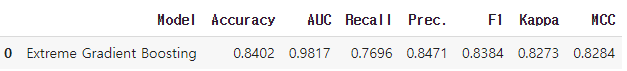

In [ ]:
prediction2_1

,Machinery_Encode,Assembly_Encode,청구품목_Encode,part1_Encode,key2_Encode,Label,Score
4299,109,170,438,519,4,4,0.9941
9367,8,1053,5417,2466,23,23,0.7905
4831,138,1210,4517,692,24,24,0.9539
12583,93,1286,4844,3886,18,18,0.8044
13994,109,517,4517,4686,24,40,0.5777
...,...,...,...,...,...,...,...
17416,111,590,2260,6206,24,24,0.9964
3719,114,156,4913,269,12,12,0.6562
10425,93,1663,5445,2940,8,8,0.9899
10022,117,153,5015,2770,25,25,0.9914


In [ ]:
xg2_2 = create_model('xgboost',fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8172,0.0000,0.7404,0.8259,0.8152,0.8021,0.8034
1,0.8345,0.0000,0.7913,0.8401,0.8321,0.8211,0.8221
2,0.8185,0.9797,0.7455,0.8205,0.8140,0.8039,0.8047
3,0.8155,0.9803,0.7708,0.8168,0.8120,0.8011,0.8016
4,0.8200,0.9822,0.6990,0.8220,0.8144,0.8057,0.8065
5,0.8215,0.9782,0.7671,0.8299,0.8192,0.8075,0.8082
6,0.8117,0.9732,0.7439,0.8225,0.8085,0.7963,0.7976
7,0.8148,0.9787,0.7545,0.8187,0.8104,0.7998,0.8009
8,0.8117,0.0000,0.7504,0.8165,0.8099,0.7970,0.7975


In [ ]:
prediction2_2 = predict_model(xg2_2, data= VAL2)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=4691, reg_alpha=0, ...), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.8402,0.9817,0.7696,0.8471,0.8384,0.8273,0.8284


In [ ]:
xg2_3 = create_model('xgboost',fold=15)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8205,0.9817,0.7454,0.8265,0.8166,0.8060,0.8070
1,0.8363,0.9822,0.8261,0.8422,0.8340,0.8232,0.8242
2,0.8194,0.9793,0.7185,0.8182,0.8116,0.8049,0.8059
3,0.8228,0.0000,0.7644,0.8313,0.8175,0.8084,0.8095
4,0.8262,0.0000,0.7738,0.8313,0.8221,0.8126,0.8133
5,0.8126,0.0000,0.7111,0.8178,0.8080,0.7981,0.7985
6,0.8273,0.0000,0.7551,0.8314,0.8223,0.8130,0.8146
7,0.8237,0.0000,0.7389,0.8244,0.8176,0.8095,0.8104
8,0.8136,0.0000,0.7255,0.8148,0.8092,0.7988,0.7994


INFO:logs:create_model_container: 3
INFO:logs:master_model_container: 3
INFO:logs:display_container: 8
INFO:logs:XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=4691, reg_alpha=0, ...)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
prediction2_3 = predict_model(xg2_3, data= VAL2 )

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=4691, reg_alpha=0, ...), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.8402,0.9817,0.7696,0.8471,0.8384,0.8273,0.8284


## 5:5 로 설정


In [ ]:
clf3= setup(data=TR3, target='key2_Encode')

,Description,Value
0,session_id,4653
1,Target,key2_Encode
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(10542, 5)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='key2_Encode', time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

In [ ]:
xg3_1 = create_model('xgboost',fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7466,0.0000,0.6998,0.7502,0.7393,0.7249,0.7263
1,0.7493,0.9610,0.6029,0.7562,0.7438,0.7275,0.7294
2,0.7486,0.9634,0.6845,0.7604,0.7435,0.7268,0.7287
3,0.7690,0.9634,0.7093,0.7775,0.7654,0.7496,0.7509
4,0.7525,0.9652,0.6469,0.7600,0.7471,0.7317,0.7329
Mean,0.7532,0.7706,0.6687,0.7609,0.7478,0.7321,0.7336
Std,0.0081,0.3853,0.0392,0.0091,0.0091,0.0090,0.0089


INFO:logs:create_model_container: 1
INFO:logs:master_model_container: 1
INFO:logs:display_container: 2
INFO:logs:XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=4653, reg_alpha=0, ...)
INFO:logs:create_model() succesfully completed......................................


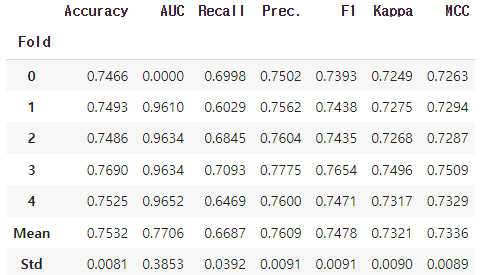

In [ ]:
prediction3_1 = predict_model(xg3_1,VAL3 )

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=4653, reg_alpha=0, ...), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.774,0.9676,0.6933,0.7805,0.7717,0.7554,0.7566


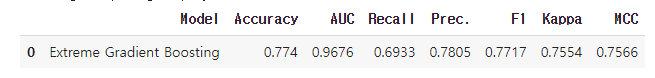

In [ ]:
prediction3_1

,Machinery_Encode,Assembly_Encode,청구품목_Encode,part1_Encode,key2_Encode,Label,Score
0,93,1286,4844,3886,18,18,0.6304
1,3,786,3655,3132,40,40,0.9982
2,117,45,3166,3569,39,39,0.9955
3,109,633,4902,3062,40,40,0.9696
4,111,591,6,935,24,24,0.9925
...,...,...,...,...,...,...,...
4423,174,1487,6154,7093,60,60,0.9996
4424,138,1303,1216,603,33,33,0.9715
4425,109,366,4214,6585,8,8,0.7467
4426,65,1253,3613,1924,40,40,0.9859


In [ ]:
# xg3_2 = create_model('xgboost',fold=10)

In [ ]:
# xg3_3 = create_model('xgboost',fold=15)